# Credit Card Fraud Detection

### Importing Important Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

#### Loading the Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fraudTrain.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fraudTest.csv')

####  Exploratory Data Analysis

In [4]:
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0




#### Data Visualization

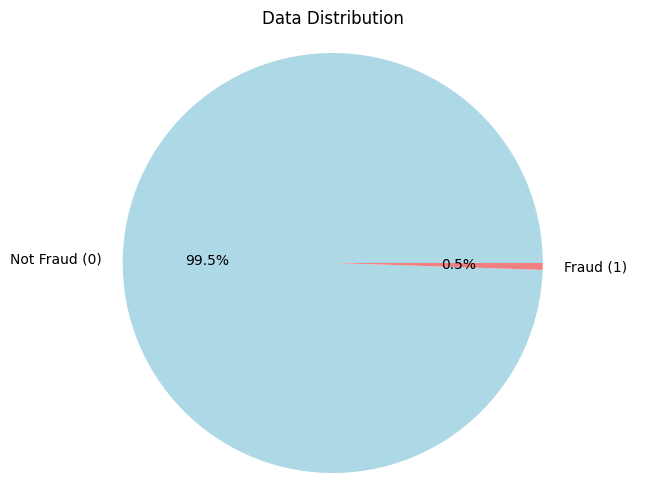

In [5]:
data = pd.concat([train_data, test_data], ignore_index=True)
fraud_counts = data['is_fraud'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(fraud_counts, labels=['Not Fraud (0)', 'Fraud (1)'], autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Data Distribution')
plt.axis('equal')

plt.show()

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

#### Data Preprocessing

In [8]:
train_data.isnull().sum(),test_data.isnull().sum()

(Unnamed: 0               0
 trans_date_trans_time    0
 cc_num                   0
 merchant                 0
 category                 0
 amt                      0
 first                    0
 last                     0
 gender                   0
 street                   0
 city                     0
 state                    0
 zip                      0
 lat                      0
 long                     0
 city_pop                 0
 job                      0
 dob                      0
 trans_num                0
 unix_time                0
 merch_lat                0
 merch_long               0
 is_fraud                 0
 dtype: int64,
 Unnamed: 0               0
 trans_date_trans_time    0
 cc_num                   0
 merchant                 0
 category                 0
 amt                      0
 first                    0
 last                     0
 gender                   0
 street                   0
 city                     0
 state                    0
 zip 

In [9]:
cols_to_drop = ['Unnamed: 0','cc_num','merchant','first','last','trans_num','unix_time','street','category']
train_data.drop(columns=cols_to_drop,inplace = True)
test_data.drop(columns=cols_to_drop,inplace = True)

In [10]:
print(train_data.shape)
print(test_data.shape)

(1296675, 14)
(555719, 14)


In [11]:
train_data['lat_dist'] = abs(round(train_data['merch_lat']-train_data['lat'],2))
train_data['long_dist'] = abs(round(train_data['merch_long']-train_data['long'],2))

test_data['lat_dist'] = abs(round(test_data['merch_lat']-test_data['lat'],2))
test_data['long_dist'] = abs(round(test_data['merch_long']-test_data['long'],2))

In [12]:
cols_to_drop = ['trans_date_trans_time','city','lat','long','job','dob','merch_lat','merch_long','state']
train_data.drop(columns=cols_to_drop,inplace = True)
test_data.drop(columns=cols_to_drop,inplace = True)

In [13]:
train_data.head()

,amt,gender,zip,city_pop,is_fraud,lat_dist,long_dist
0,4.97,F,28654,3495,0,0.07,0.87
1,107.23,F,99160,149,0,0.27,0.02
2,220.11,M,83252,4154,0,0.97,0.11
3,45.00,M,59632,1939,0,0.80,0.45
4,41.96,M,24433,99,0,0.25,0.83


In [14]:
train_data.gender =[ 1 if value == "M" else 0 for value in train_data.gender]
test_data.gender =[ 1 if value == "M" else 0 for value in test_data.gender]

In [15]:
train_data.head()

,amt,gender,zip,city_pop,is_fraud,lat_dist,long_dist
0,4.97,0,28654,3495,0,0.07,0.87
1,107.23,0,99160,149,0,0.27,0.02
2,220.11,1,83252,4154,0,0.97,0.11
3,45.00,1,59632,1939,0,0.80,0.45
4,41.96,1,24433,99,0,0.25,0.83


#### Data Splitting

In [16]:
X_train = train_data.drop('is_fraud',axis=1)
X_test = test_data.drop('is_fraud',axis=1)
Y_train = train_data['is_fraud']
Y_test = test_data['is_fraud']

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_trian = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [18]:
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

#### Classification Models

#####  Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_imputed, Y_train)
Y_pred = lr.predict(X_test_imputed)

In [20]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.86


##### Decision Tree Classifier

In [21]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state = 45)
dtc.fit(X_train,Y_train)
Y_pred = dtc.predict(X_test)

In [22]:
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


#### Random Forest Classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,Y_train)
Y_pred = rfc.predict(X_test)

In [25]:
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00
